<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_RS_gr2/blob/main/Borisov%20Vasily/Profpatolog_%2B_Hazard_Risk_%2B_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from gensim.models.fasttext import FastText
import pandas as pd
import numpy as np
import gdown
from sklearn.model_selection import train_test_split 
import requests 
from urllib.parse import urlencode 
 
# читаем список нужных нам полей с ЯД (файл эксель)
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/i/QWJez3NW1JGGcg' 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
download_response = requests.get(download_url) 
df_polei = pd.read_excel(download_url) 

gdown.download('https://storage.yandexcloud.net/terratraineeship/23_InspectrumClinic_RS/datasets/датасет%20профпатолог%20часть.xlsx', None, quiet=True)
data = pd.read_excel('датасет%20профпатолог%20часть.xlsx')

In [ ]:
for (columnName, columnData) in data.items():
  print(columnName + ' /// ' + str(columnData.nunique()))

ДокументПрохождениеМедосмотра /// 1915
Клиент /// 1911
КлиентДатаРождения /// 1797
КлиентПол /// 2
КлиентПолПредставление /// 2
ДатаЗавершенияМедосмотра /// 85
ТипМедосмотра /// 2
ТипМедосмотраПредставление /// 2
ПсихОсвидетельствование /// 2
Контрагент /// 177
Цех /// 183
Профессия /// 690
ЗаключениеМК /// 9
ЗаключениеМКПредставление /// 9
Заключение /// 14
ДиспансернаяГруппа /// 7
ДиспансернаяГруппаПредставление /// 5
ВредныеФакторы /// 515
ЛабораторныеИсследования1_ДокументПрием /// 1594
ЛабораторныеИсследования1_ДатаПриема /// 1590
ЛабораторныеИсследования1_Салон /// 6
ЛабораторныеИсследования1_СалонПредставление /// 4
ЛабораторныеИсследования1_Специализация /// 3
ЛабораторныеИсследования1_СпециализацияПредставление /// 3
ЛабораторныеИсследования1_ХР_Рекомендация1 /// 2
ЛабораторныеИсследования1_ХР_Рекомендация1Представление /// 1
ЛабораторныеИсследования1_ХР_Рекомендация2 /// 1
ЛабораторныеИсследования1_ХР_Рекомендация2Представление /// 0
ЛабораторныеИсследования1_ХР_РекомендацияС

In [ ]:
data=data.replace('ГоденСКоррекциейЗрения','ОграниченноГоден')
data=data.replace('ГоденБезРаботНаВысотах','ОграниченноГоден')
data=data.replace('НуждаетсяВДообследованииИЛечении','ВременноНегоден')
columnsWithLists = ['ВредныеФакторы']
data.shape


(1982, 4587)

In [ ]:
data500  = data.copy() 
nmp=df_polei['POLE'].tolist()
print(nmp)

for (columnName, columnData) in data500.items():
  if (str(columnName) in nmp)==False:
    data500.pop(columnName)

data500 = data500[data500.ЗаключениеМК.isin(['Годен', 'ВременноНегоден', 'ОграниченноГоден']) == True ]
print(data500.shape)
  

['КлиентПолПредставление', 'Профессия', 'ЗаключениеМК', 'ВредныеФакторы', 'Рентгенология1_Заключение_ЗначениеПредставление', 'ПсихиатрияНаркология1_МКБ101', 'ПсихиатрияНаркология1_ГоденНегоден_ЗначениеПредставление', 'Офтальмология1_МКБ101', 'Офтальмология1_ГоденНегоден_ЗначениеПредставление', 'Оториноларингология1_МКБ101', 'Оториноларингология1_ГоденНегоден_ЗначениеПредставление', 'ХирургНеИсп1_МКБ101', 'ХирургНеИсп1_ГоденНегоден_ЗначениеПредставление', 'Гинекология1_МКБ101', 'Гинекология1_ГоденНегоден_ЗначениеПредставление', 'Стоматология1_МКБ101', 'Стоматология1_ГоденНегоден_ЗначениеПредставление', 'Терапия1_ГоденНегоден_ЗначениеПредставление', 'Дерматовенерология1_МКБ101', 'Дерматовенерология1_ГоденНегоден_ЗначениеПредставление', 'Рентгенология1_МКБ101', 'Рентгенология1_ПрофнепригодностьВременная1', 'Неврология1_МКБ101', 'Неврология1_ПрофнепригодностьВременная1', 'Неврология1_ГоденНегоден_ЗначениеПредставление', 'Терапия1_МКБ101', 'Хирургия1_МКБ101', 'Хирургия1_ГоденНегоден_Значени

In [ ]:
razdelitel = ","
ListOfColumnNames = []
ListOfColumnValues = []
ListOfColumnNames_Lists = []
for (columnName, columnData) in data500.items():
  ListOfColumnNames.append(columnName)
  if columnName in columnsWithLists:
    ListOfColumnValues.append(list(set(razdelitel.join(data500[columnName].tolist()).splitlines()[0].split(','))))
  else:  
    ListOfColumnValues.append(list(data500[columnName].dropna().unique().flatten()))

In [ ]:
def get_vector(row, columnNumber):
  i = 0
  vector = []
  vectorLen = len(ListOfColumnValues[columnNumber])
  if vectorLen < 25:
    while i < vectorLen:
      if (ListOfColumnValues[columnNumber][i] == row[columnNumber]):
        Null_or_One = 1
      else:
        Null_or_One = 0
      vector = np.hstack([vector, Null_or_One])
      i+=1
  return vector


def get_vector_from_list(row, columnNumber):
  i = 0
  vector = []
  vectorLen = len(ListOfColumnValues[columnNumber])
  rowToList = ((row[columnNumber].split(',')))
  while i < vectorLen:
    if (ListOfColumnValues[columnNumber][i] in rowToList):
      Null_or_One = 1
    else:
      Null_or_One = 0
    vector = np.hstack([vector, Null_or_One])
    i+=1
  return vector


def extract_row_data(row):
  x1_data = []
  x2_data = []
  y_data = []
  for columnName in ListOfColumnNames:
    columnNumber = ListOfColumnNames.index(columnName)
    if columnName == 'ЗаключениеМК':
      y_data = np.hstack([y_data, get_vector(row, columnNumber)])
    elif columnName in columnsWithLists:
      x2_data = np.hstack([x2_data, get_vector_from_list(row, columnNumber)])
    else:
      x1_data = np.hstack([x1_data, get_vector(row, columnNumber)])
  return x1_data, x2_data, y_data



def construct_train_data(row_list):
    x1_data = []
    x2_data = []
    y_data = []
    for row in row_list:
      x1, x2, y = extract_row_data(row)
      x1_data.append(x1)
      x2_data.append(x2)
      y_data.append(y)
    return np.array(x1_data), np.array(x2_data), np.array(y_data)


x1_data500, x2_data500, y_data500 = construct_train_data(data500.values)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
prof_text = []
for row in data500.values:
  prof_text.append(str(row[1]))

tokenizer = Tokenizer(#num_words=1000, # объем словаря
                      filters='!"#$%&()*+,-–—./:;<=>?@[\\]^_`{|}~\t\n\xa0', # убираемые из текста ненужные символы 
                      lower=True, # приведение слов к нижнему регистру
                      split=' ', # разделитель слов
                      oov_token='unknown', # указание разделять по словам, а не по единичным символам
                      char_level=False # токен для слов, которые не вошли в словарь
                      )

tokenizer.fit_on_texts(prof_text) 

items = list(tokenizer.word_index.items())       # Получение индексов слов
prof_seq = tokenizer.texts_to_sequences(prof_text)
x3_data500 = tokenizer.sequences_to_matrix(prof_seq)



In [ ]:
# Разбиение наборов на общую и тестовую выборки
x1_all, x1_test, x2_all, x2_test, x3_all, x3_test, y_all, y_test = train_test_split(
                                                x1_data500,
                                                x2_data500,
                                                x3_data500, 
                                                y_data500, 
                                                test_size=0.1, 
                                                shuffle=True, 
                                                random_state = 6)

# Разбиение общей выборки на обучающую и проверочную 
x1_train, x1_val, x2_train, x2_val, x3_train, x3_val, y_train, y_val = train_test_split(
                                                  x1_all, 
                                                  x2_all, 
                                                  x3_all, 
                                                  y_all, 
                                                  test_size=0.1, 
                                                  shuffle=True, 
                                                  random_state = 6) 

In [ ]:
!pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.7/527.7 kB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 117.3 MB/s eta 0:00:00


In [ ]:
import autokeras as ak
search = ak.StructuredDataClassifier(max_trials=15)
search.fit(x=x1_train, y=y_train, verbose=1)

Trial 15 Complete [00h 02m 39s]
val_accuracy: 0.9352226853370667

Best val_accuracy So Far: 0.9433198571205139
Total elapsed time: 00h 30m 48s
Epoch 1/10
40/40 [==============================] - 7s 60ms/step - loss: 0.4560 - accuracy: 0.8670
Epoch 2/10
40/40 [==============================] - 1s 37ms/step - loss: 0.2109 - accuracy: 0.9245
Epoch 3/10
40/40 [==============================] - 1s 36ms/step - loss: 0.1589 - accuracy: 0.9292
Epoch 4/10
40/40 [==============================] - 1s 36ms/step - loss: 0.1387 - accuracy: 0.9394
Epoch 5/10
40/40 [==============================] - 2s 38ms/step - loss: 0.1275 - accuracy: 0.9465
Epoch 6/10
40/40 [==============================] - 3s 66ms/step - loss: 0.1192 - accuracy: 0.9559
Epoch 7/10
40/40 [==============================] - 1s 36ms/step - loss: 0.1143 - accuracy: 0.9559
Epoch 8/10
40/40 [==============================] - 1s 37ms/step - loss: 0.1091 - accuracy: 0.9583
Epoch 9/10
40/40 [==============================] - 2s 38ms/step 

In [ ]:
model.save('keras_test_save_model')
model1 = tf.keras.models.load_model("keras_test_save_model/")

5/5 [==============================] - 0s 38ms/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 329)]             0         
                                                                 
 multi_category_encoding (Mu  (None, 329)              0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 329)              659       
 n)                                                              
                                                                 
 dense (Dense)               (None, 256)               84480     
                                                                 
 re_lu (ReLU)                (None, 256)               0         
                                                                 
 dense_1 

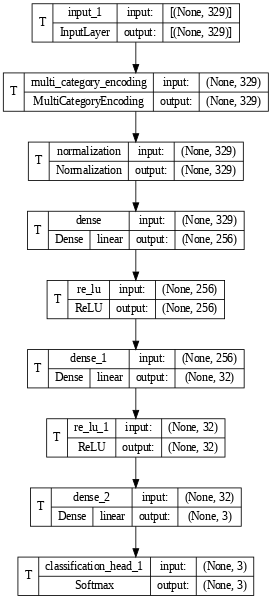

In [ ]:
from tensorflow.keras import utils 
loss, acc = search.evaluate(x1_test, y_test, verbose=0) #classification
mae, _ = search.evaluate(x1_test, y_test, verbose=0) #regression
y_predictions = search.predict(x1_test)
model = search.export_model()
model.summary()
utils.plot_model(model, show_shapes=True, show_layer_names=True, dpi=60, show_layer_activations=True, show_trainable=True)

In [ ]:
print(loss, acc, mae)

0.1823931187391281 0.9430379867553711 0.1823931187391281


In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import Dense, Dropout, concatenate, Input, CategoryEncoding, Normalization, Activation
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import utils 
# from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt 
import tensorflow as tf
from PIL import Image 


%matplotlib inline 

# Разбиение наборов на общую и тестовую выборки
x1_all, x1_test, x2_all, x2_test, x3_all, x3_test, y_all, y_test = train_test_split(
                                                x1_data500,
                                                x2_data500,
                                                x3_data500, 
                                                y_data500, 
                                                test_size=0.1, 
                                                shuffle=True, 
                                                random_state = 6)

# Разбиение общей выборки на обучающую и проверочную 
x1_train, x1_val, x2_train, x2_val, x3_train, x3_val, y_train, y_val = train_test_split(
                                                  x1_all, 
                                                  x2_all, 
                                                  x3_all, 
                                                  y_all, 
                                                  test_size=0.1, 
                                                  shuffle=True, 
                                                  random_state = 6)


# model = Sequential()
# model.add(Dense(800, input_dim=x1_train.shape[1], activation='relu')) 
# model.add(Dropout(0.1, noise_shape=None, seed=None))
# model.add(Dense(400, activation='relu')) 
# model.add(Dense(3, activation='softmax')) 
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# history = model.fit(x1_train, y_train, batch_size=128, epochs=50, verbose=1, validation_split=0.1)

input1 = Input((x1_train.shape[1],))
input2 = Input((x2_train.shape[1],))
input3 = Input((x3_train.shape[1],))

x1 = input1                               # Ветка 1
# x1 = CategoryEncoding()(x1)
x1 = Normalization()(x1)
x1 = Dense(256, activation="linear")(x1)
x1 = Activation('relu')(x1)
x1 = Dense(32, activation="linear")(x1)
x1 = Activation('relu')(x1)
x1 = Dense(3, activation="linear")(x1)

x2 = input2                               # Ветка 2
# x2 = Dense(20, activation="relu")
# x2 = Dropout(0.1)
# x2 = Dense(500, activation="relu")
x2 = Dense(20, activation="relu")(x2)
x2 = Dropout(0.1)(x2)
x2 = Dense(500, activation="relu")(x2)

x3 = input3                               # Ветка 3
x3 = Dense(50, activation="relu")(x3)
# x3 = Dropout(0.1)(x3)
x3 = Dense(500, activation="relu")(x3)

x23 = concatenate([x2, x3])             # Объединение 3 веток
x23 = Dense(15, activation='tanh')(x23) # Промежуточный слой
x = concatenate([x1, x23])              # Объединение 3 веток

x = Dense(15, activation='relu')(x)       # Промежуточный слой
x = Dropout(0.1)(x)
x = Dense(3, activation='softmax')(x)      # Финальный регрессирующий нейрон

# В Model передаются входы и выход
model_final = Model((input1, input2, input3), x)

# model_final.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['mae'])
model_final.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
history = model_final.fit([x1_train, x2_train, x3_train], 
                           y_train,
                           batch_size=256, 
                           epochs=150, 
                           validation_split=0.15,
                           verbose=1)

Epoch 1/150
5/5 [==============================] - 4s 72ms/step - loss: 1.0580 - accuracy: 0.5991 - val_loss: 0.9601 - val_accuracy: 0.9215
Epoch 2/150
5/5 [==============================] - 0s 14ms/step - loss: 0.9343 - accuracy: 0.8944 - val_loss: 0.8521 - val_accuracy: 0.9215
Epoch 3/150
5/5 [==============================] - 0s 13ms/step - loss: 0.8569 - accuracy: 0.9019 - val_loss: 0.7768 - val_accuracy: 0.9215
Epoch 4/150
5/5 [==============================] - 0s 12ms/step - loss: 0.7951 - accuracy: 0.9037 - val_loss: 0.7056 - val_accuracy: 0.9215
Epoch 5/150
5/5 [==============================] - 0s 13ms/step - loss: 0.7279 - accuracy: 0.9037 - val_loss: 0.6481 - val_accuracy: 0.9215
Epoch 6/150
5/5 [==============================] - 0s 12ms/step - loss: 0.6769 - accuracy: 0.9037 - val_loss: 0.5973 - val_accuracy: 0.9215
Epoch 7/150
5/5 [==============================] - 0s 18ms/step - loss: 0.6245 - accuracy: 0.9037 - val_loss: 0.5476 - val_accuracy: 0.9215
Epoch 8/150
5/5 [===

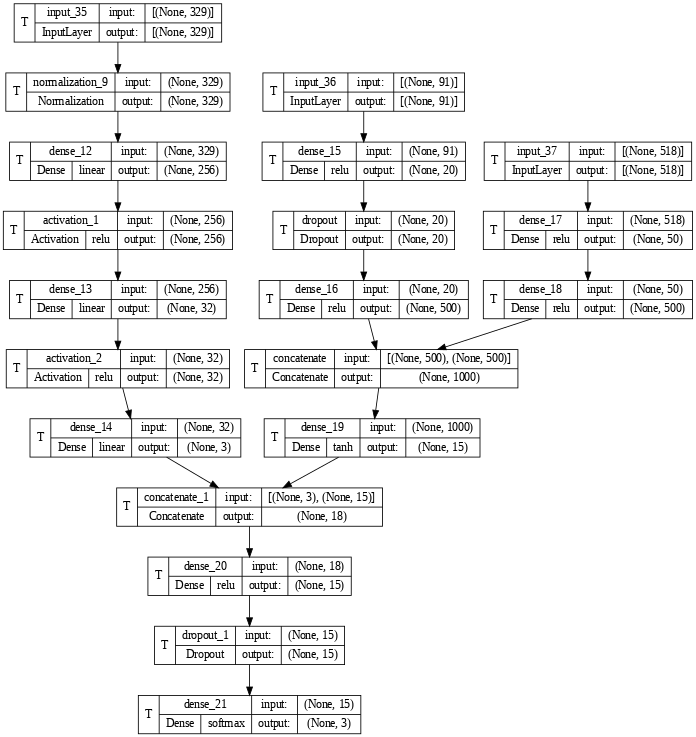

In [ ]:
utils.plot_model(model_final, show_shapes=True, show_layer_names=True, dpi=60, show_layer_activations=True, show_trainable=True)


5/5 [==============================] - 0s 5ms/step - loss: 0.5475 - accuracy: 0.9225


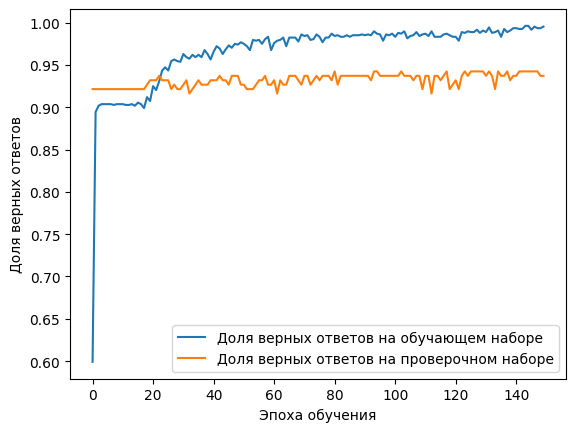

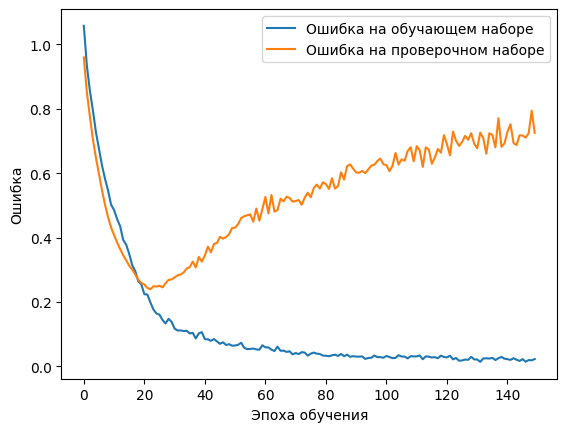

In [ ]:
scores = model_final.evaluate([x1_test, x2_test, x3_test], 
                        y_test, 
                        verbose=1
                        )
scores2 = model_final.evaluate([x1_val, x2_val, x3_val], 
                        y_val, 
                        verbose=1
                        )
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')

# Визуализация точности на проверочной выборке
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')

# Отрисовка подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Отрисовка легенды
plt.legend()

# Вывод графика
plt.show()


plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')

plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')

plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')

plt.legend()

plt.show()